In [1]:
import numpy as np
from google.colab import drive
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.flush_and_unmount()
drive.mount("/content/gdrive")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive


In [3]:
def load_metrics(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

In [4]:
import glob
print(glob.glob("/content/gdrive/MyDrive/KLTN/code/result_model_*.json"))

['/content/gdrive/MyDrive/KLTN/code/result_model_UNet3D.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWCoT.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWCoTDA.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DPretrained_pretrained.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWConvNeXtV2CoT.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_liver.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_tumor.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_tumor_1.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_tumor_2.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_tumor_2d.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_liver_1.json', '/content/gdrive/MyDrive/KLTN/code/result_model_UNet2DWResNeXtCoT_tumor_2d_1.json', '/co

## Liver

In [5]:
model_results_cot = load_metrics('/content/gdrive/MyDrive/KLTN/code/result_model_UNet3DWResNeXtCoT_liver.json')
model_results_mcb = load_metrics('/content/gdrive/MyDrive/KLTN/code/result_model_MSC_CoTNeXtUNet_liver_mcb.json')
model_results_msa = load_metrics('/content/gdrive/MyDrive/KLTN/code/result_model_MSCoTNeXtUNet_liver_msa.json')

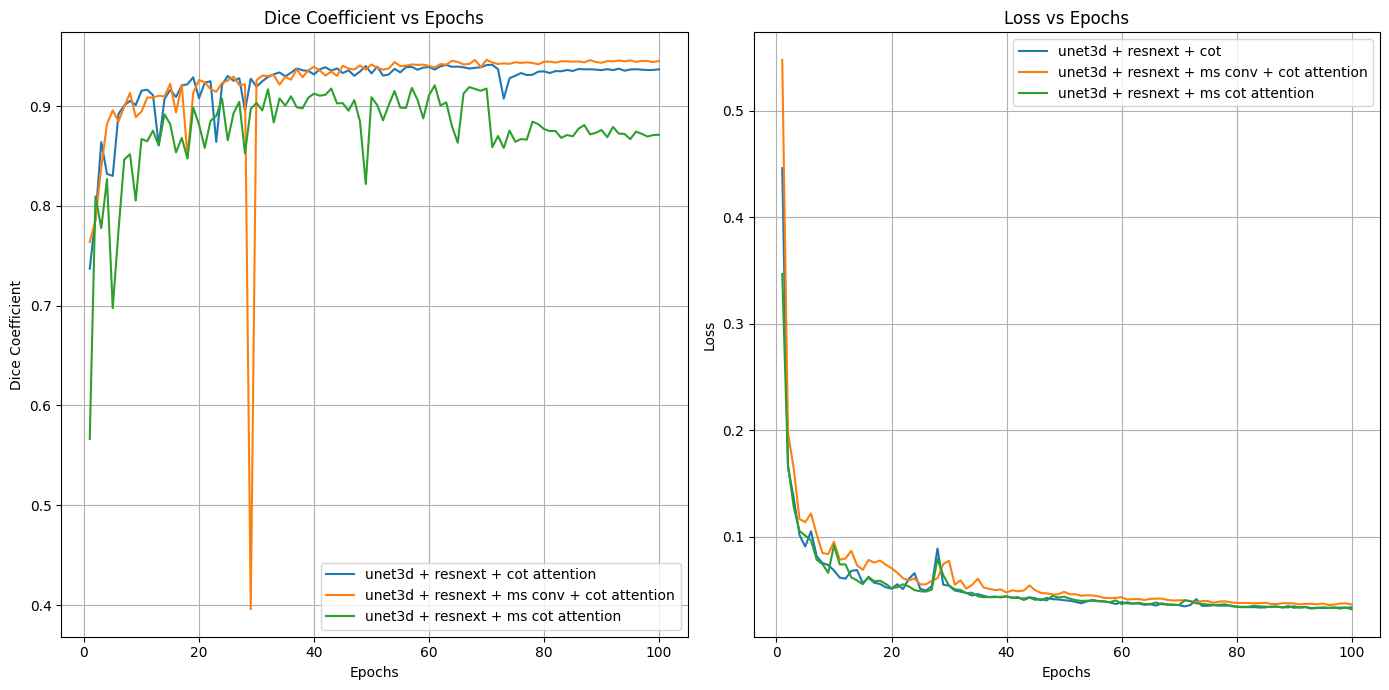

In [6]:
epochs = list(range(1, len(model_results_cot["dice_liver"]) + 1))
plt.figure(figsize=(14, 7))

# dice
plt.subplot(1, 2, 1)
plt.plot(epochs, model_results_cot["dice_liver"], label='unet3d + resnext + cot attention')
plt.plot(epochs, model_results_mcb["dice_liver"], label='unet3d + resnext + ms conv + cot attention')
plt.plot(epochs, model_results_msa["dice_liver"], label='unet3d + resnext + ms cot attention ')
plt.title('Dice Coefficient vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid()

#loss
plt.subplot(1, 2, 2)
plt.plot(epochs, model_results_cot["loss"], label='unet3d + resnext + cot ')
plt.plot(epochs, model_results_mcb["loss"], label='unet3d + resnext + ms conv + cot attention')
plt.plot(epochs, model_results_msa["loss"], label='unet3d + resnext + ms cot attention ')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [9]:
data = {
    "Model": ["unet3d + resnext + cot attention", "unet3d + resnext + ms conv + cot attention", "unet3d + resnext + ms cot attention"],
    "Dice (%)": [max(model_results_cot["dice_liver"]), max(model_results_mcb["dice_liver"]), max(model_results_msa["dice_liver"])],
    "IoU (%)": [max(model_results_cot["iou_liver"]), max(model_results_mcb["iou_liver"]), max(model_results_msa["iou_liver"])],
    "Precision (%)": [max(model_results_cot["precision_liver"]), max(model_results_mcb["precision_liver"]), max(model_results_msa["precision_liver"])],
    "Recall (%)": [max(model_results_cot["recall_liver"]), max(model_results_mcb["recall_liver"]), max(model_results_msa["recall_liver"])]
}


In [12]:
df = pd.DataFrame(data)
print(df.to_string(index=False))

                                     Model  Dice (%)  IoU (%)  Precision (%)  Recall (%)
          unet3d + resnext + cot attention  0.941408 0.891121       0.961203    0.968926
unet3d + resnext + ms conv + cot attention  0.946353 0.898905       0.966396    0.959084
       unet3d + resnext + ms cot attention  0.920857 0.860217       0.960091    0.938329


## tumor
